In [1]:
# Constants
DATA_PATH   = "../Data/Processed/1_preprocessed_df.pkl"


TECH_JOBS = ['Cloud infrastructure engineer',
             'Developer, embedded applications or devices',
             'Data or business analyst',
             'System administrator',
             'Developer, front-end',
             'Scientist',
             'DevOps specialist',
             'Developer, game or graphics',
             'Academic researcher',
             'Security professional',
             'Developer, QA or test',
             'Blockchain',
             'Developer, full-stack',
             'Data scientist or machine learning specialist',
             'Developer, mobile',
             'Developer, desktop or enterprise applications',
             'Developer, back-end',
             'Database administrator',
             'Engineer, data']

CORE_COLS = ['VersionControlSystem',
             'Languages',
             'Databases',
             'Platforms',
             'WebFrameworks',
             'MiscTech',
             'ToolsTech',
             'CollabTools'
]

USEFUL_COLS= ['Employment','RemoteWork',
              'MainBranch','CodingActivities','ProfessionalTech',
              'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert',
              'WorkExp', 'YearsCode', 'YearsCodePro', 'EdLevel',
              'OrgSize', 'Country',
              'ConvertedCompYearly', 'Currency', 'CompTotal', 'CompFreq']

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

_______

### Functions

In [3]:
# Create a Folder named Images to save figures in.
IMAGES_PATH = Path.cwd().parent / "Images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    This functions will save the current figure shown below.
    
    Args:
        fig_id: String Containing the name of the figure.
        tight_layout: Boolean to decide whether you want a tight layout or not.
        fig_extension: String to decide the type of the figure.
        resoultion: Int to decide the resolution of the figure.
        
    Returns:
        None
    """
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(path, format=fig_extension, dpi=resolution)

_____

### Questions we need to answer
- **Jobs:**
    - **What is the frequency of each job?**
    - **How are the Jobs correlated with each other?**
- **Skills:**
    - **What is the frequency of each skill?**
    - **How are skills correlated with each other?**
- **Jobs & Skills relationship:**
    - **How are skills correlated to Jobs?**
    - **What is the specificity of each skill to a job?**
- **General**
    - **what is the Top 5 Jobs in each country?**
    - **Is there a relation between Jobs and Education Level?**
    - **What is the average salary of each job and average salary in each country?**
    - **Is there a relation between salary and years of code as professional?**

In [4]:
# Load dataset and make a copy
prep_df = pd.read_pickle(DATA_PATH)
df = prep_df.copy()

In [11]:
df['VersionControlSystem'] = df['VersionControlSystem'].apply(lambda x: x if isinstance(x, list) else [])

In [15]:
# Convert the skills columns using multilabelbinarizer
from sklearn.preprocessing import MultiLabelBinarizer
encoded_dfs = {}
encoded_dfs['TechJob'] = df[TECH_JOBS]
for col in CORE_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                               columns=binarizer.classes_,
                               index=df[col].index)
    encoded_dfs[col] = encoded_df

In [16]:
encoded_dfs = pd.concat(encoded_dfs, axis=1)

In [18]:
encoded_dfs.head()

TechJob                                              \
  Cloud infrastructure engineer Developer, embedded applications or devices   
2                             0                                           0   
3                             0                                           0   
4                             0                                           0   
7                             0                                           0   
8                             0                                           0   

                                                                      \
  Data or business analyst System administrator Developer, front-end   
2                        0                    0                    1   
3                        0                    0                    0   
4                        0                    0                    1   
7                        0                    0                    0   
8                        0                    0                    0   

                                                                               \
  Scientist DevOps specialist Developer, game or graphics Academic researcher   
2         0                 0                           0                   0   
3         0                 0                           0                   0   
4         0                 0                           0                   0   
7         0                 0                           0                   0   
8         0                 0                           0                   0   

                                                          \
  Security professional Developer, QA or test Blockchain   
2                     0                     0          0   
3                     0                     0          0   
4                     0                     1          0   
7                     0                     0          0   
8                     0                     0          0   

                                                                       \
  Developer, full-stack Data scientist or machine learning specialist   
2                     0                                             1   
3                     1                                             0   
4                     1                                             0   
7                     1                                             0   
8                     0                                             0   

                                                                   \
  Developer, mobile Developer, desktop or enterprise applications   
2                 0                                             0   
3                 0                                             0   
4                 0                                             1   
7                 0                                             0   
8                 0                                             0   

                                                             \
  Developer, back-end Database administrator Engineer, data   
2                   0                      0              1   
3                   0                      0              0   
4                   1                      0              0   
7                   0                      0              0   
8                   1                      0              0   

  VersionControlSystem                                                        \
                   Git I don't use one Mercurial Other (please specify): SVN   
2                    1               0         0                       0   0   
3                    1               0         0                       0   0   
4                    1               0         0                       1   0   
7                    1               0         0                       0   0   
8                    1               0         0          

In [19]:
encoded_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57284 entries, 2 to 73267
Columns: 185 entries, ('TechJob', 'Cloud infrastructure engineer') to ('CollabTools', 'Xcode')
dtypes: int32(185)
memory usage: 40.9 MB


### What is the Frequency of each job?

In [39]:
# create a df contains the tech_jobs and its frequency
jobs_freq = encoded_dfs['TechJob'].copy().sum().sort_values(ascending=False).reset_index()

In [99]:
# Rename the columns
jobs_freq.columns =['Tech_Jobs','Frequency']
jobs_freq

,Tech_Jobs,Frequency
0,"Developer, full-stack",28701
1,"Developer, back-end",26595
2,"Developer, front-end",15915
3,"Developer, desktop or enterprise applications",9546
4,"Developer, mobile",7634
5,DevOps specialist,6170
6,Cloud infrastructure engineer,5283
7,Database administrator,4934
8,System administrator,4908
9,"Developer, embedded applications or devices",3923


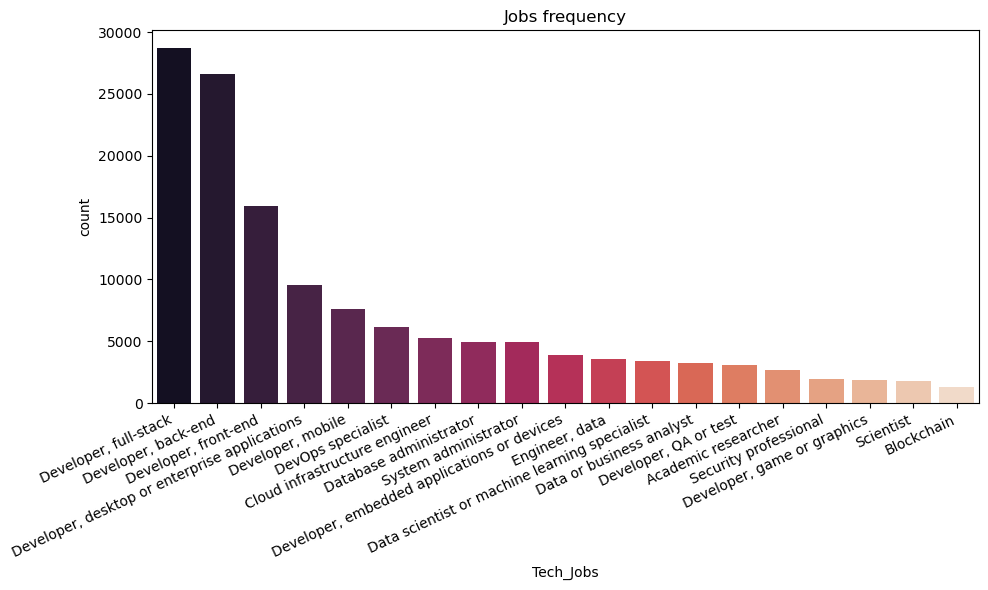

In [100]:
# define Seaborn color palette 
palette_color = sns.color_palette("rocket", len(jobs_freq))

# Set the fig size
plt.figure(figsize=(10, 6))

# Create a bar plot to calculate the frequency of each job
sns.barplot(x='Tech_Jobs', y='Frequency', data=jobs_freq, palette= palette_color)

# Set ylabel
plt.ylabel('count')
# Set Title
plt.title('Jobs frequency')
# Rotate the xticks
plt.xticks(rotation=25, ha='right')
plt.tight_layout()

# Save the figure
save_fig('1-Jobs-frequency')
plt.show()

- **Inference:**
    - **The 3 top most jobs are full stack, back-end and front-end developer**
    - **The jobs data seems imblanced, So some jobs need to be resampled** 

### What is the frequency of each skill?

In [113]:
# Create a data frame contains skills categories , skills in categories and their frequency
skills_freq = encoded_dfs[CORE_COLS].copy().sum().sort_values(ascending=False).reset_index()

In [114]:
# Rename the columns
skills_freq.columns= ['category','skill','frequency']
skills_freq

,group,skill,frequency
0,VersionControlSystem,Git,54680
1,CollabTools,Visual Studio Code,43254
2,Languages,JavaScript,39748
3,ToolsTech,Docker,35353
4,Languages,HTML/CSS,31689
5,Languages,SQL,31196
6,Languages,Python,30581
7,ToolsTech,npm,30249
8,Platforms,AWS,28559
9,Databases,PostgreSQL,28247


In [122]:
# Find the frequency of each value in each group of skills
for col in CORE_COLS:
    print(skills_freq.loc[skills_freq['group'] == col])

                    group                    skill  frequency
0    VersionControlSystem                      Git      54680
98   VersionControlSystem                      SVN       3431
127  VersionControlSystem  Other (please specify):       1817
140  VersionControlSystem          I don't use one       1315
154  VersionControlSystem                Mercurial        697
         group        skill  frequency
2    Languages   JavaScript      39748
4    Languages     HTML/CSS      31689
5    Languages          SQL      31196
6    Languages       Python      30581
10   Languages   TypeScript      27572
14   Languages         Java      19967
18   Languages           C#      18419
21   Languages   Bash/Shell      17695
27   Languages           Go      15131
31   Languages         Rust      13902
34   Languages          C++      13740
36   Languages          PHP      12864
43   Languages            C      10710
50   Languages       Kotlin       9291
58   Languages   PowerShell       7828
70  

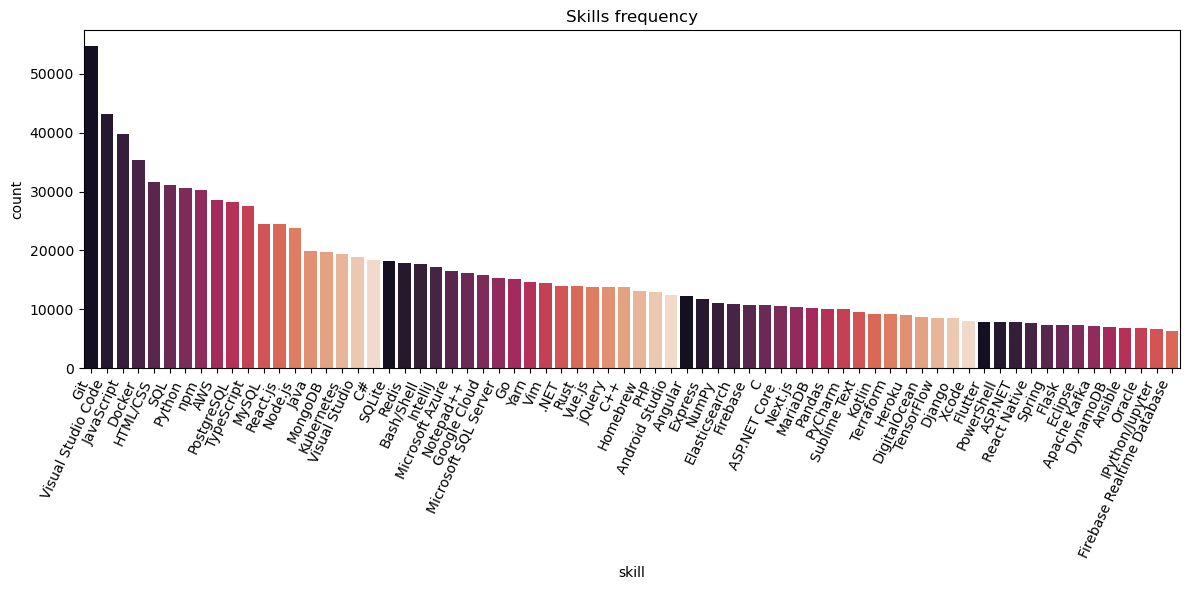

In [146]:
# define Seaborn color palette 
palette_color = sns.color_palette("rocket", len(jobs_freq))

# Set the fig size
plt.figure(figsize=(12, 6))

# Create a bar plot to calculate the frequency of each skill
sns.barplot(x='skill', y='frequency', data=skills_freq[:70], palette= palette_color)

# Set ylabel
plt.ylabel('count')
# Set Title
plt.title('Skills frequency')
# Rotate the xticks
plt.xticks(rotation=65, ha='right')
plt.tight_layout()

# Save the figure
save_fig('2-Skills-frequency')
plt.show()

- **Inference:**
    - **The skills frequency ranges from 55000 to 300, This implies that the skills data is imbalanced too.**
    - **Delete `I don't use one` and `Other (please specify):` from `VersionControlSystem` columns**

### How are skills correlated to Jobs?

In [177]:
TECH_JOBS
TECH_SKILLS = skills_freq['skill'].tolist()

In [155]:
sorted_roles = df['DevType'].sum().sort_values().index.tolist()
sorted_skills = df.drop('DevType', axis=1).sum().sort_values(ascending=False).droplevel(level=0).index.tolist()

KeyError: 'DevType'

In [180]:
skills = []

# For each role, calculate the percentage of each skill
for role in TECH_JOBS:
    # Filter for the role
    role_mask = (encoded_dfs[('TechJob', role)] == 1)

    #For each skill column, calculate mean of the one-hot-encoded -> percentage
    skills_role = pd.concat({tech_col: encoded_dfs.loc[role_mask, tech_col].mean() * 100
                             for tech_col in TECH_JOBS})

    # Append to original list
    skills.append(skills_role)

# Concat and format
skills = pd.concat(skills, axis=1)
skills.columns = sorted_roles
skills = skills.reset_index(level=0, drop=True)
skills = skills.loc[TECH_SKILLS]
skills = skills.T

KeyError: 'Cloud infrastructure engineer'

In [ ]:
How are the Jobs correlated with each other?

In [ ]:
How are skills correlated with each other?

In [ ]:
How are skills correlated to Jobs?

In [ ]:
What is the specificity of each skill to a job?

In [ ]:
    - **what is the Top 5 Jobs in each country?**
    - **Is there a relation between Jobs and Education Level?**
    - **What is the average salary of each job and average salary in each country?**
    - **Is there a relation between salary and years of code as professional?**

In [95]:
df['EdLevel'].sample(5)
df['YearsCode'].sample(5)
df['YearsCodePro'].sample(5)
df['Country'].sample(5)
df[['Currency','CompTotal','CompFreq','ConvertedCompYearly']].sample(10)

,Currency,CompTotal,CompFreq,ConvertedCompYearly
64792,THB\tThai baht,70000.0,Monthly,24588.0
42066,NZD\tNew Zealand dollar,87500.0,Yearly,56292.0
1644,AMD\tArmenian dram,NaN,Monthly,NaN
56277,CHF\tSwiss franc,100000.0,Yearly,103419.0
54243,USD\tUnited States dollar,150000.0,Yearly,150000.0
23428,USD\tUnited States dollar,40000.0,Yearly,40000.0
70014,NaN,NaN,NaN,NaN
51224,NaN,NaN,NaN,NaN
29198,GBP\tPound sterling,50000.0,Yearly,62820.0
2712,GBP\tPound sterling,55000.0,Yearly,69102.0
